### Advanced Algorithm and Graph Mining Exam
#### Part II - Pandas
I'm Lorenzo Pisaneschi, I'm 25 years old, and I am from Pistoia, Tuscany, Italy.
I achieve my Bachelor degree in Computer Engineering at University of Study
of Florence (UNIFI) with a thesis on "An application of NeuroGPS on light sheet
microscopic images".

In this Jupyter Notebook, COVID-19 data (from regions and provinces
in Italy) are analyzed to visualize some useful information about the
pandemic which has upset the world. This work has been realized on
Ubuntu 19.10 with the PyCharm IDE. This data inspection is powered by
Pandas and Matplotlib.

More info are available at this
[GItHub Repo](https://github.com/pisalore/AAGM_exam "AAGM exam GitHUb repository")

Load data about COVID-19 pandemic in Italy, focusing on the provincial
and regional ones. Data are provided in JSON format, ready to be analyzed.

In [64]:
import datetime as dt
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

with open('dpc-covid19-ita-province.json') as json_provinces_data:
        provinces_data = json.load(json_provinces_data)
with open('dpc-covid19-ita-regioni.json') as json_regions_data:
        regions_data = json.load(json_regions_data)

##### Regions data
Here is displayed a table with all the Italian Regions COVID-19 data.
Results are grouped for date.

In [65]:
pd.options.display.max_rows = 100
dF_regions = pd.read_json(r'dpc-covid19-ita-regioni.json')
display(dF_regions)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,,
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,,
2,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,,
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,,
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2020-06-22T17:00:00,ITA,9,Toscana,43.769231,11.255889,18,9,27,333,360,-5,1,8752,1099,10211,313455,218271.0,,
2516,2020-06-22T17:00:00,ITA,22,P.A. Trento,46.068935,11.121231,0,0,0,53,53,0,1,3945,466,4464,112483,58794.0,,
2517,2020-06-22T17:00:00,ITA,10,Umbria,43.106758,12.388247,4,1,5,8,13,-2,0,1347,78,1438,88714,61375.0,,
2518,2020-06-22T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,4,0,4,1,5,0,0,1042,146,1193,18239,13294.0,,


##### Provinces data
Here is displayed a table with all the Italian Provinces COVID-19 data.
Results are grouped for date.

In [66]:
dF_provinces = pd.read_json(r'dpc-covid19-ita-province.json')
dF_provinces = dF_provinces[dF_provinces['denominazione_provincia'] != 'In fase di definizione/aggiornamento']
display(dF_provinces)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,,
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,,
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,,
5,2020-02-24T18:00:00,ITA,17,Basilicata,77,Matera,MT,40.667512,16.597924,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...
15354,2020-06-22T17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,443,,
15355,2020-06-22T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,2669,,
15356,2020-06-22T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,2680,,
15357,2020-06-22T17:00:00,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,5121,,


### Overall Plots
In this section, general data visualization is provided: below, totals
(total COVID-19 cases, recovered, deaths and active cases in Italy)
are shown, with a more detailed inspection regarding total and new cases
variations. This section's goal is to make available a very first data view
about the COVID-19 Italian national trend.

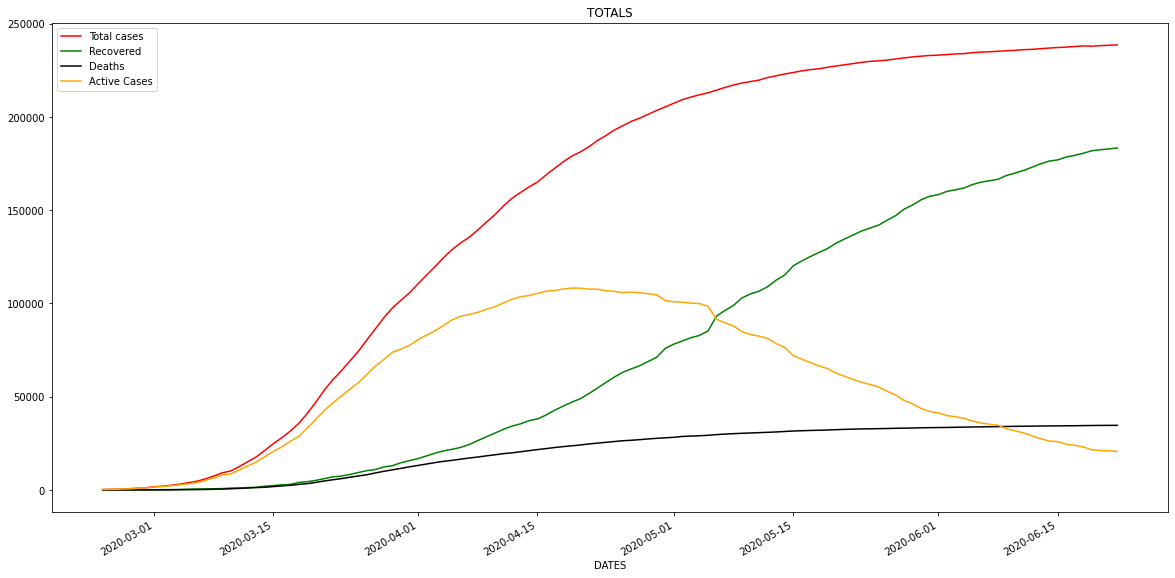

In [67]:
dates, complete_dates,total_cases, recovered, deaths, daily_deaths, active_cases, new_cases, percentage_variation, cases_variation = [], [], [], [], [], [], [], [], [], []

previous_deaths = 0
for date_group in dF_regions.groupby(['data']):
    t, r, d, nc, vc, dd = date_group[1]['totale_casi'].sum(),\
              date_group[1]['dimessi_guariti'].sum(), \
              date_group[1]['deceduti'].sum(),\
              date_group[1]['nuovi_positivi'].sum(),\
              date_group[1]['variazione_totale_positivi'].sum(),\
              date_group[1]['deceduti'].sum() - previous_deaths

    total_cases.append(t)
    recovered.append(r)
    deaths.append(d)
    daily_deaths.append(dd)
    previous_deaths = d
    active_cases.append(t  - r - d)
    new_cases.append(nc)
    percentage_variation.append(nc / t * 100)
    cases_variation.append(vc)
    complete_dates.append(date_group[0])
    dates.append(date_group[0].split('T')[0])

x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

fig, ax = plt.subplots(figsize = (20, 10))
plt.plot(x_dates, total_cases, label='Total cases', color="red")
plt.plot(x_dates, recovered, label='Recovered', color="green")
plt.plot(x_dates, deaths, label='Deaths', color="black")
plt.plot(x_dates, active_cases, label='Active Cases', color="orange")
ax.set(xlabel='DATES',title='TOTALS')
plt.legend(loc="upper left")
# fig.savefig("totals_regional.png")
plt.gcf().autofmt_xdate()
plt.show()

#### New Cases and Active Cases
Another interesting way to read data with respect to che "active cases" is to
visualize daily increment and percentage variation
in relation with total cases. In the next chart it is possible to visualize
how active cases have been varied during the pandemic in comparision with active cases,
then, the percentage variation ( new cases / total cases, in percent).


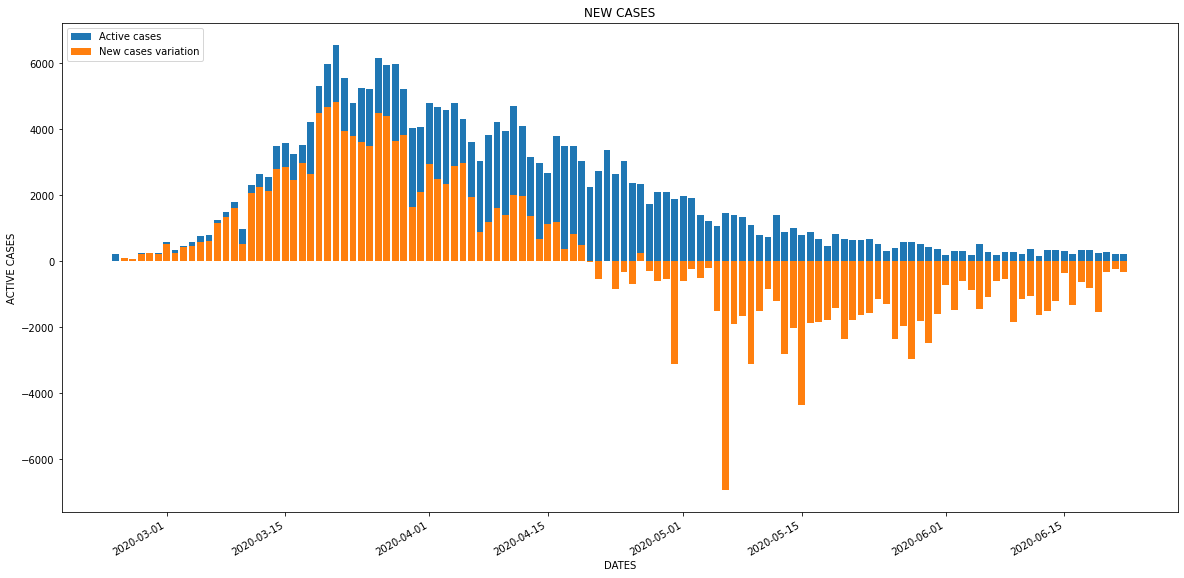

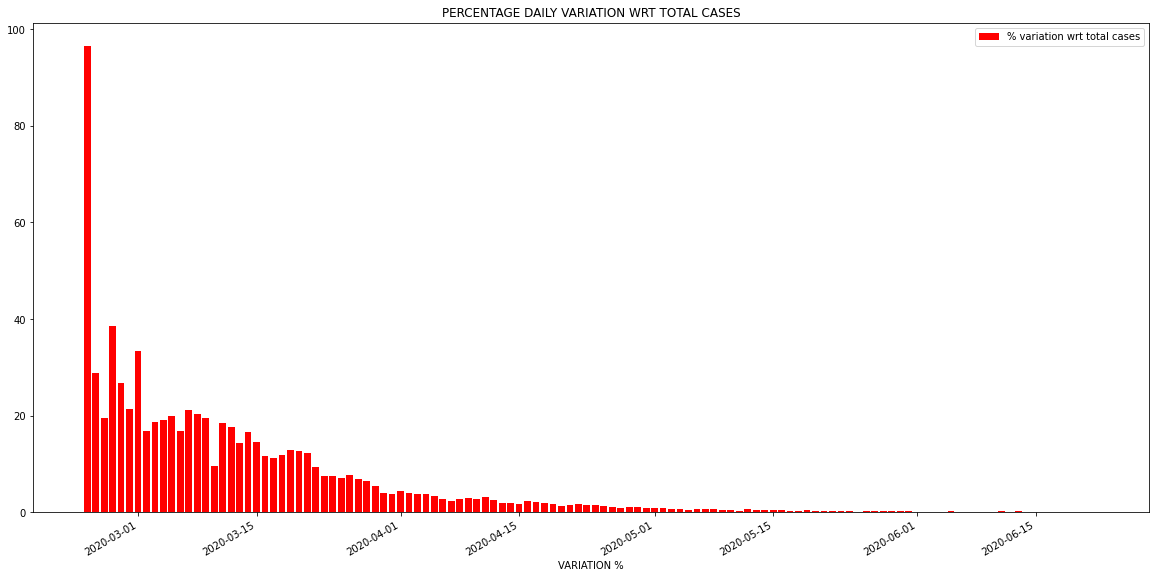

In [68]:
fig1, ax1 = plt.subplots(figsize = (20, 10))
ax1.set(xlabel='DATES', YLABEL='ACTIVE CASES',title='NEW CASES')
ax1.bar(x_dates, new_cases, label='Active cases')
ax1.bar(x_dates, cases_variation, label='New cases variation')

plt.legend(loc="upper left")
plt.gcf().autofmt_xdate()

fig2, ax2 = plt.subplots(figsize = (20, 10))
ax2.set(xlabel='VARIATION %', ylabel='',title='PERCENTAGE DAILY VARIATION WRT TOTAL CASES')
ax2.bar(x_dates, percentage_variation, label='% variation wrt total cases', color='red')
plt.legend(loc="upper right")
plt.gcf().autofmt_xdate()
plt.show()

#### SSN data (Italian National Health Service)
However, despite the above numbers (important, but not everything) during a
pandemic a strong Health Service is fundamental; consequently, it is important
to know how to read Health Service data in order to be able to understand the
situation day by day and to move in the right way and limit damages.

In the following, a graph that summarizes the national
health data is presented, focusing on the active cases in the time, dividing
them by home isolation, hospitalization and intensive care.

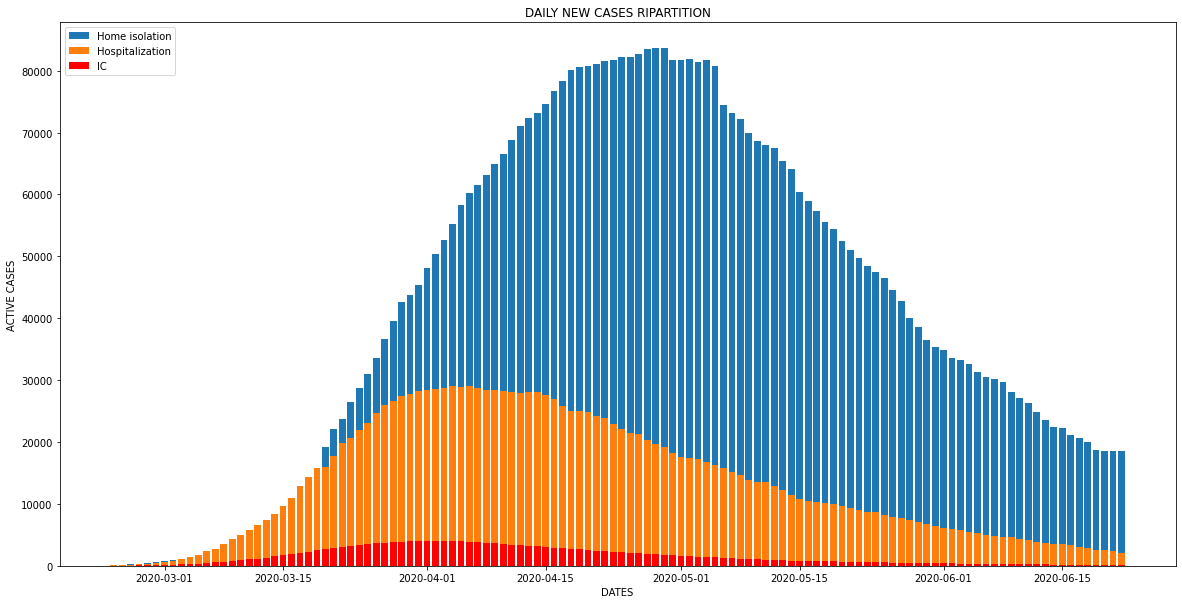

In [69]:
home_isolation, hospitalization, ic, swabs, new_cases_to_swabs = [], [], [], [], []
previous_swabs = 0
for date_group in dF_regions.groupby(['data']):
    home_isolation.append(date_group[1]['isolamento_domiciliare'].sum()),\
    hospitalization.append(date_group[1]['ricoverati_con_sintomi'].sum()), \
    ic.append(date_group[1]['terapia_intensiva'].sum())
    s_tot = date_group[1]['tamponi'].sum()
    s = s_tot - previous_swabs
    previous_swabs = s_tot
    swabs.append(s)
    new_cases_to_swabs.append(date_group[1]['nuovi_positivi'].sum() / s * 100)

fig3, ax3 = plt.subplots(figsize = (20, 10))
ax3.set(xlabel='DATES', ylabel='ACTIVE CASES',title='DAILY NEW CASES RIPARTITION')
ax3.bar(x_dates, home_isolation, label='Home isolation')
ax3.bar(x_dates, hospitalization, label='Hospitalization')
ax3.bar(x_dates, ic, label='IC', color='red')
plt.legend(loc="upper left")
plt.show()

#### Tests and New Cases
It is also very important to know how many were positives among the people tested with the
pharyngeal laryngeal swab, which is considered the most accurate. In the
follow,the tested positives percentage and the total performed tests
are shown. Since swabs number reported in data is related to their total
(every day the swabs number is obtained by the sum between the current and
previous date performed test) the following graph is generated isolating
the tests' for each day.

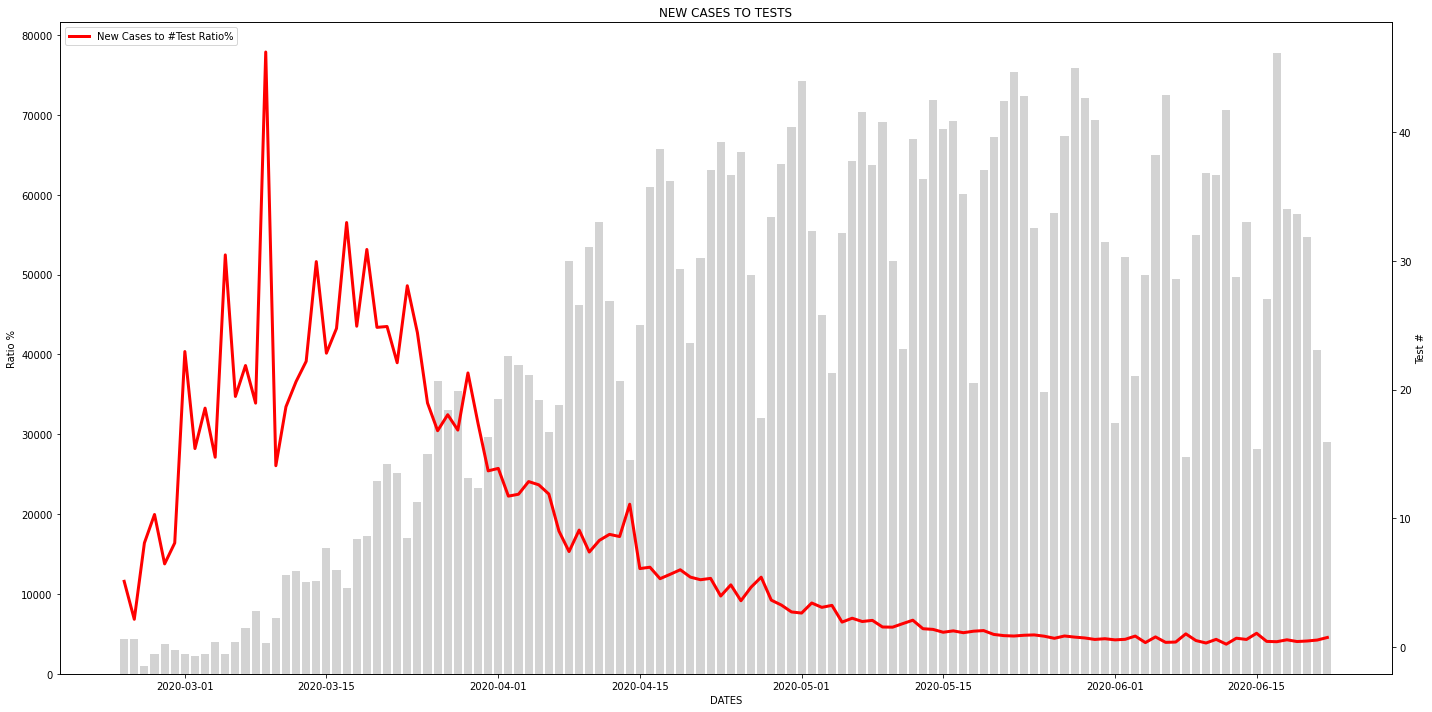

In [70]:
fig4, ax4 = plt.subplots(figsize = (20, 10))
ax4.set(xlabel='DATES', ylabel='Ratio %',title='NEW CASES TO TESTS')
ax4.bar(x_dates, swabs, color='lightgrey')
ax5 = ax4.twinx()
ax5.set_ylabel('Test #') # we already handled the x-label with ax1
ax5.plot(x_dates, new_cases_to_swabs, label='New Cases to #Test Ratio%', color="red", linewidth=3)
plt.legend(loc="upper left")
fig4.tight_layout()

plt.show()


#### Sum Up
With the above charts we could have an idea about how the pandemic evolved
during the last four month. It's clear that the quarantine had very important
effects on the phenomenon evolution. The "artificial" pandemic peak (since
it has been reached following some strict rules) was reached in the period
between the end of april and the beginning of March. Surely, we have to
consider that every day the tests' number is different, so the data relating
to "new cases" is not so reliable, like the one related to the "active cases".
On the other hand, the "new cases to tests' number ratio" give us a more accurate
analysis respect to the pandemic evolution, since this data represent a sort of
normalization respect to the daily "new cases". Going on, as mentioned before,
the health data (moreover the ICU one) is very important: an health system
with the hospitalizations under control guarantees assistance to new infected
people, even in the case of new COVID-19 waves.

###### Today situation
In the follow, to date situation.

In [71]:
dF_today = dF_regions.loc[dF_regions.data == '2020-06-22T17:00:00',
               ['data', 'denominazione_regione','totale_casi',
                'dimessi_guariti', 'deceduti', 'tamponi']]
dF_today['percentuale_guariti'] = dF_today['dimessi_guariti'] / dF_today['totale_casi'] * 100
display(dF_today)

,data,denominazione_regione,totale_casi,dimessi_guariti,deceduti,tamponi,percentuale_guariti
2499,2020-06-22T17:00:00,Abruzzo,3282,2428,460,98872,73.979281
2500,2020-06-22T17:00:00,Basilicata,401,366,27,37370,91.271820
2501,2020-06-22T17:00:00,P.A. Bolzano,2633,2252,292,80085,85.529814
2502,2020-06-22T17:00:00,Calabria,1174,1044,97,88372,88.926746
2503,2020-06-22T17:00:00,Campania,4624,4060,431,266472,87.802768
2504,2020-06-22T17:00:00,Emilia-Romagna,28243,22854,4235,455992,80.919166
2505,2020-06-22T17:00:00,Friuli Venezia Giulia,3305,2889,344,175706,87.413011
2506,2020-06-22T17:00:00,Lazio,8025,6250,830,319581,77.881620
2507,2020-06-22T17:00:00,Liguria,9935,8133,1552,137579,81.862104
2508,2020-06-22T17:00:00,Lombardia,93111,62900,16573,964735,67.553780


###### Region with minimum total cases

In [72]:
display(dF_today.loc[dF_today['totale_casi'].idxmin()])

data                     2020-06-22T17:00:00
denominazione_regione             Basilicata
totale_casi                              401
dimessi_guariti                          366
deceduti                                  27
tamponi                                37370
percentuale_guariti                  91.2718
Name: 2500, dtype: object

###### Region with maximum total cases

In [73]:
display(dF_today.loc[dF_today['totale_casi'].idxmax()])

data                     2020-06-22T17:00:00
denominazione_regione              Lombardia
totale_casi                            93111
dimessi_guariti                        62900
deceduti                               16573
tamponi                               964735
percentuale_guariti                  67.5538
Name: 2508, dtype: object

###### Region with minimum recovered patients

In [74]:
display(dF_today.loc[dF_today['percentuale_guariti'].idxmin()])

data                     2020-06-22T17:00:00
denominazione_regione              Lombardia
totale_casi                            93111
dimessi_guariti                        62900
deceduti                               16573
tamponi                               964735
percentuale_guariti                  67.5538
Name: 2508, dtype: object

###### Region with maximum recovered patients

In [75]:
display(dF_today.loc[dF_today['percentuale_guariti'].idxmax()])

data                     2020-06-22T17:00:00
denominazione_regione                 Umbria
totale_casi                             1438
dimessi_guariti                         1347
deceduti                                  78
tamponi                                88714
percentuale_guariti                  93.6718
Name: 2517, dtype: object

###### Region with minimum deaths


In [76]:
display(dF_today.loc[dF_today['deceduti'].idxmin()])

data                     2020-06-22T17:00:00
denominazione_regione                 Molise
totale_casi                              444
dimessi_guariti                          378
deceduti                                  23
tamponi                                20752
percentuale_guariti                  85.1351
Name: 2510, dtype: object

###### Region with maximum deaths


In [77]:
display(dF_today.loc[dF_today['deceduti'].idxmax()])

data                     2020-06-22T17:00:00
denominazione_regione              Lombardia
totale_casi                            93111
dimessi_guariti                        62900
deceduti                               16573
tamponi                               964735
percentuale_guariti                  67.5538
Name: 2508, dtype: object

###### The day with the higher total new cases value


In [78]:
higher_new_cases_day = dF_regions.loc[dF_regions['data']
                          == complete_dates[new_cases.index(max(new_cases))],
               ['data', 'denominazione_regione','nuovi_positivi']]
display(higher_new_cases_day)
print('Max total new cases in a day:', higher_new_cases_day['nuovi_positivi'].sum())


,data,denominazione_regione,nuovi_positivi
546,2020-03-21T17:00:00,Abruzzo,80
547,2020-03-21T17:00:00,Basilicata,14
548,2020-03-21T17:00:00,P.A. Bolzano,73
549,2020-03-21T17:00:00,Calabria,28
550,2020-03-21T17:00:00,Campania,95
551,2020-03-21T17:00:00,Emilia-Romagna,737
552,2020-03-21T17:00:00,Friuli Venezia Giulia,134
553,2020-03-21T17:00:00,Lazio,182
554,2020-03-21T17:00:00,Liguria,215
555,2020-03-21T17:00:00,Lombardia,3251


Max total new cases in a day: 6557


###### The day with higher recovered number


In [79]:
all_new_recovered = np.zeros(dF_regions.shape[0])
for region in dF_regions.groupby(['denominazione_regione']):
    new_recovered = 0
    last_recovered = 0
    for region_date in region[1].groupby(['data']):
        recovered = region_date[1]['dimessi_guariti'].tolist(),
        new_recovered = recovered[0][0] - last_recovered
        last_recovered = recovered[0][0]
        index = dF_regions.loc[(dF_regions['denominazione_regione'] == region[0]) & (dF_regions['data'] == region_date[0])].index.values[0].tolist()
        all_new_recovered[index] = new_recovered
all_new_recovered.astype(int)
dF_regions['nuovi_dimessi_guariti'] = all_new_recovered
daily_new_recovered = []
for date_group in dF_regions.groupby(['data']):
    dnr = date_group[1]['nuovi_dimessi_guariti'].sum()
    daily_new_recovered.append(dnr)

higher_new_recovered_day = dF_regions.loc[dF_regions['data']
                          == complete_dates[daily_new_recovered.index(max(daily_new_recovered))],
                            ['data', 'denominazione_regione','nuovi_dimessi_guariti']]

display(higher_new_recovered_day)
print('Higher number of recovered per day:', higher_new_recovered_day['nuovi_dimessi_guariti'].sum())

,data,denominazione_regione,nuovi_dimessi_guariti
1512,2020-05-06T17:00:00,Abruzzo,34.0
1513,2020-05-06T17:00:00,Basilicata,8.0
1514,2020-05-06T17:00:00,P.A. Bolzano,34.0
1515,2020-05-06T17:00:00,Calabria,8.0
1516,2020-05-06T17:00:00,Campania,197.0
1517,2020-05-06T17:00:00,Emilia-Romagna,362.0
1518,2020-05-06T17:00:00,Friuli Venezia Giulia,28.0
1519,2020-05-06T17:00:00,Lazio,14.0
1520,2020-05-06T17:00:00,Liguria,186.0
1521,2020-05-06T17:00:00,Lombardia,5881.0


Higher number of recovered per day: 8014.0


###### The day with higher deaths number


In [80]:
all_new_deaths = np.zeros(dF_regions.shape[0])
for region in dF_regions.groupby(['denominazione_regione']):
    new_deaths = 0
    last_deaths = 0
    for region_date in region[1].groupby(['data']):
        deaths = region_date[1]['deceduti'].tolist(),
        new_deaths = deaths[0][0] - last_deaths
        last_deaths = deaths[0][0]
        index = dF_regions.loc[(dF_regions['denominazione_regione'] == region[0]) & (dF_regions['data'] == region_date[0])].index.values[0].tolist()
        all_new_deaths[index] = new_deaths
all_new_deaths.astype(int)
dF_regions['nuovi_deceduti'] = all_new_deaths
daily_new_deaths = []
for date_group in dF_regions.groupby(['data']):
    dnd = date_group[1]['nuovi_deceduti'].sum()
    daily_new_deaths.append(dnd)

higher_new_deaths_day = dF_regions.loc[dF_regions['data']
                          == complete_dates[daily_new_deaths.index(max(daily_new_deaths))],
                            ['data', 'denominazione_regione','nuovi_deceduti']]

display(higher_new_deaths_day)
print('Higher number of deaths per day:', higher_new_deaths_day['nuovi_deceduti'].sum())


,data,denominazione_regione,nuovi_deceduti
672,2020-03-27T17:00:00,Abruzzo,5.0
673,2020-03-27T17:00:00,Basilicata,2.0
674,2020-03-27T17:00:00,P.A. Bolzano,12.0
675,2020-03-27T17:00:00,Calabria,4.0
676,2020-03-27T17:00:00,Campania,15.0
677,2020-03-27T17:00:00,Emilia-Romagna,93.0
678,2020-03-27T17:00:00,Friuli Venezia Giulia,4.0
679,2020-03-27T17:00:00,Lazio,12.0
680,2020-03-27T17:00:00,Liguria,51.0
681,2020-03-27T17:00:00,Lombardia,541.0


Higher number of deaths per day: 969.0


### Provinces data analysis
Regional and provincial datas are correleted. Italian Protezione Civile provides everyday
up to date data about total COVID-19 cases which have been registered in each province. In the follow, it is showm the
pandemic situation all around Italy, in terms of "total cases" registered per each province in each region since
2020-02-24. It is also shown the "total province cases" to "total regional cases" ratio, in order to understand how the
virus spread in Italy.

In [81]:
# pd.set_option('display.max_rows', None)
dF_regions2 = dF_regions[['data', 'denominazione_regione', 'totale_casi']]
dF_provinces2 = dF_provinces[['data', 'denominazione_regione','denominazione_provincia', 'totale_casi']]
cases_by_regions_and_provinces = pd.merge(dF_regions2, dF_provinces2, on=['denominazione_regione', 'data'])
cases_by_regions_and_provinces.columns = ['data', 'denominazione_regione','totale_casi_regionali', 'denominazione_provincia', 'totale_casi_provincia']
cases_by_regions_and_provinces.set_index(['denominazione_regione', 'data'], inplace=True)
cases_by_regions_and_provinces['% casi'] = cases_by_regions_and_provinces['totale_casi_provincia'] \
                                             / cases_by_regions_and_provinces['totale_casi_regionali'] * 100
cases_by_regions_and_provinces


totale_casi_regionali  \
denominazione_regione data                                         
Abruzzo               2020-02-24T18:00:00                      0   
                      2020-02-24T18:00:00                      0   
                      2020-02-24T18:00:00                      0   
                      2020-02-24T18:00:00                      0   
Basilicata            2020-02-24T18:00:00                      0   
...                                                          ...   
Veneto                2020-06-22T17:00:00                  19247   
                      2020-06-22T17:00:00                  19247   
                      2020-06-22T17:00:00                  19247   
                      2020-06-22T17:00:00                  19247   
                      2020-06-22T17:00:00                  19247   

                                          denominazione_provincia  \
denominazione_regione data                                          
Abruzzo               2020-02-24T18:00:00                  Chieti   
                      2020-02-24T18:00:00                L'Aquila   
                      2020-02-24T18:00:00                 Pescara   
                      2020-02-24T18:00:00                  Teramo   
Basilicata            2020-02-24T18:00:00                  Matera   
...                                                           ...   
Veneto                2020-06-22T17:00:00                  Rovigo   
                      2020-06-22T17:00:00                 Treviso   
                      2020-06-22T17:00:00                 Venezia   
                      2020-06-22T17:00:00                  Verona   
                      2020-06-22T17:00:00                 Vicenza   

                                           totale_casi_provincia     % casi  
denominazione_regione data                                                   
Abruzzo               2020-02-24T18:00:00                      0        NaN  
                      2020-02-24T18:00:00                      0        NaN  
                      2020-02-24T18:00:00                      0        NaN  
                      2020-02-24T18:00:00                      0        NaN  
Basilicata            2020-02-24T18:00:00                      0        NaN  
...                                                          ...        ...  
Veneto                2020-06-22T17:00:00                    443   2.301657  
                      2020-06-22T17:00:00                   2669  13.867096  
                      2020-06-22T17:00:00                   2680  13.924248  
                      2020-06-22T17:00:00                   5121  26.606744  
                      2020-06-22T17:00:00                   2858  14.849067  

[12519 rows x 4 columns]

##### First 10 provinces with the higher number of COVID-19 cases
From these next two tables it is evident that COVID-19 pandemic hit the most in Northern Italy, while the Southern Italy
was less affected.

In [82]:
last_provinces_data = dF_provinces.loc[dF_provinces['data'] == dF_provinces['data'].iloc[-1]]
del last_provinces_data['long']
del last_provinces_data['lat']
del last_provinces_data['note_it']
del last_provinces_data['note_en']
lpdl = last_provinces_data.nlargest(10, ['totale_casi'])[['denominazione_regione', 'denominazione_provincia', 'totale_casi']]


##### First 10 provinces with the lower number of COVID-19 cases

In [83]:
lpds = last_provinces_data.nsmallest(10, ['totale_casi'])[['denominazione_regione', 'denominazione_provincia', 'totale_casi']]


##### Max COVID-19 cases for province in each region
As we expected, the higher cases number in each region it is registered in their corresponding capital in most of cases.

In [84]:
higher_total_cases_by_province_for_region = pd.DataFrame(columns=['denominazione_regione', 'denominazione_provincia', 'totale_casi'])
for region in last_provinces_data.groupby(['denominazione_regione']):
    df = region[1][region[1].totale_casi == region[1].totale_casi.max()][['denominazione_regione', 'denominazione_provincia', 'totale_casi']]
    higher_total_cases_by_province_for_region = pd.concat([higher_total_cases_by_province_for_region, df], ignore_index=True, sort=False)

higher_total_cases_by_province_for_region

,denominazione_regione,denominazione_provincia,totale_casi
0,Abruzzo,Pescara,1543
1,Basilicata,Matera,210
2,Calabria,Cosenza,468
3,Campania,Napoli,2643
4,Emilia-Romagna,Bologna,5176
5,Friuli Venezia Giulia,Trieste,1393
6,Lazio,Roma,5911
7,Liguria,Genova,5863
8,Lombardia,Milano,24184
9,Marche,Pesaro e Urbino,2756


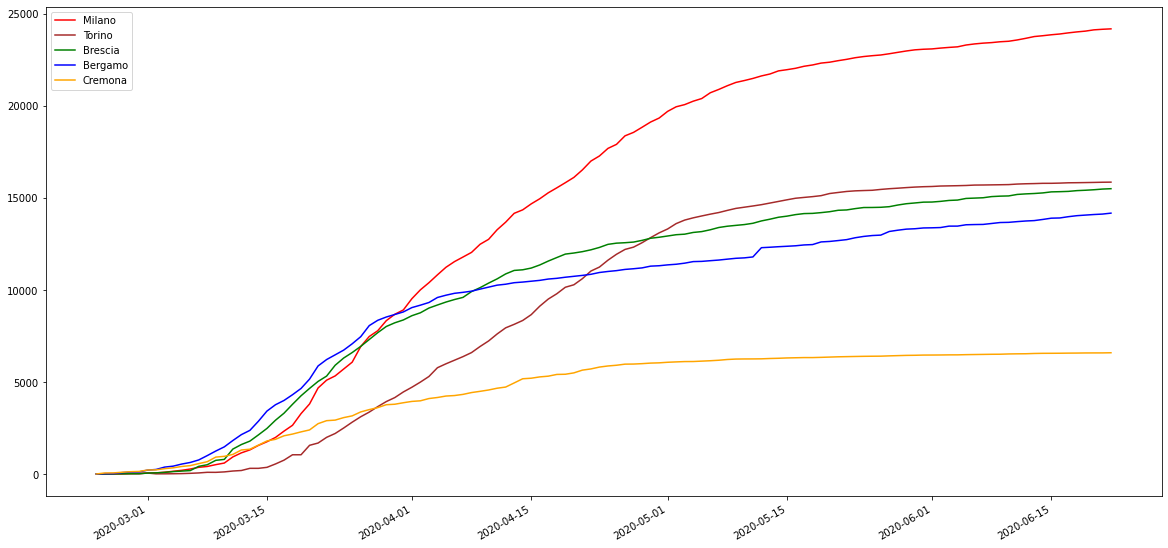

In [102]:
first_five_max_num_cases_provinces = []
for i in range(5):
    first_five_max_num_cases_provinces.append([lpdl['denominazione_provincia'].iloc[i]])
for date_group in dF_provinces.groupby(['data']):
    for j in range(5):
        first_five_max_num_cases_provinces[j]\
            .append(date_group[1].loc[date_group[1]['denominazione_provincia']
                                      == first_five_max_num_cases_provinces[j][0]]['totale_casi'].item())
colors = ['red', 'brown', 'green', 'blue', 'orange']
fig6, ax6 = plt.subplots(figsize = (20, 10))
for i in range(5):
    plt.plot(x_dates, first_five_max_num_cases_provinces[i][1:], label=first_five_max_num_cases_provinces[i][0], color=colors[i])

ax.set(xlabel='DATES', ylabel='TOTALS', title='FIRST FIVE MOST AFFECTED ITALIAN PROVINCES')
plt.legend(loc="upper left")
plt.gcf().autofmt_xdate()
plt.show()